# Ejercicio 1: Predicción de streams de canciones de Spotify. | Regresión Lineal
### Tatsuki Garcilazo Kato

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import  SimpleImputer

# Cargar los datos
data_file = "spotify-2023.csv"
data = pd.read_csv(data_file, encoding="latin1")

# Inspección inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

track_name: Nombre de la canción

artist(s)_name: Nombre del artista(s) de la canción

artist_count: Número de artistas que contribuyen a la canción

released_year: Año en el que se lanzó la canción

released_month: Mes en el que se lanzó la canción

released_day: Día del mes en el que se lanzó la canción

in_spotify_playlists: Número de listas de reproducción de Spotify en las que está incluida la canción

in_spotify_charts: Presencia y posición de la canción en las listas de Spotify

streams: Número total de reproducciones en Spotify

in_apple_playlists: Número de listas de reproducción de Apple Music en las que está incluida la canción

in_apple_charts: Presencia y posición de la canción en las listas de Apple Music

in_deezer_playlists: Número de listas de reproducción de Deezer en las que está incluida la canción

in_deezer_charts: Presencia y posición de la canción en las listas de Deezer

in_shazam_charts: Presencia y posición de la canción en Gráficos de Shazam

bpm: pulsaciones por minuto, una medida del tempo de la canción

key: tonalidad de la canción

mode: modo de la canción (mayor o menor)

danceability_%: porcentaje que indica cuán adecuada es la canción para bailar

valence_%: positividad del contenido musical de la canción

energy_%: nivel de energía percibido de la canción

acousticness_%: cantidad de sonido acústico en la canción

instrumentalness_%: cantidad de contenido instrumental en la canción

liveness_%: presencia de elementos de interpretación en vivo

speechiness_%: cantidad de palabras habladas en la canción

In [94]:
# Paso 1: Eliminar o reemplazar valores no numéricos (si existen)
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Paso 2: Manejar valores NaN que no se pudieron convertir (opcional, según el caso)
# Por ejemplo, puedes eliminarlos:
data = data.dropna(subset=['streams'])

# Paso 3: Convertir a int64
data['streams'] = data['streams'].astype('int64')

# Verificar el cambio
print(data.dtypes)


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [101]:
# Transformar 'streams' con log1p antes de la normalización
data['streams'] = np.log1p(data['streams'])

# Filtramois las columnas numéricas
num_cols=data.select_dtypes(include='number').columns.tolist()
df_num = data[num_cols]

# Normalizar las características utilizando la norma L2
normalizer = Normalizer(norm='l2')
normalized_data = normalizer.transform(df_num)

# Mostrar el DataFrame con datos normalizados L2
df_normalized = pd.DataFrame(normalized_data, columns=num_cols)
print(df_normalized)

     artist_count  released_year  released_month  released_day  \
0        0.000940       0.950536        0.003289      0.006578   
1        0.000398       0.805366        0.001194      0.009156   
2        0.000404       0.816626        0.002422      0.012110   
3        0.000123       0.248648        0.000985      0.002833   
4        0.000268       0.541199        0.001338      0.004815   
..            ...            ...             ...           ...   
947      0.000446       0.901493        0.004904      0.001338   
948      0.000426       0.860714        0.004257      0.008939   
949      0.000949       0.959241        0.005218      0.001423   
950      0.001239       0.835277        0.004131      0.008262   
951      0.000460       0.930775        0.005064      0.001841   

     in_spotify_playlists  in_spotify_charts   streams  in_apple_playlists  \
0                0.259835           0.069070  0.008818            0.020204   
1                0.586807           0.019109  0.007

C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [102]:
# Calculamos la varianza solo en las columnas numéricas
variance = df_normalized.var()
print(variance)

artist_count            1.812410e-07
released_year           9.605064e-02
released_month          2.239463e-06
released_day            1.371629e-05
in_spotify_playlists    8.875847e-02
in_spotify_charts       3.517145e-05
streams                 7.746902e-06
in_apple_playlists      6.889435e-05
in_apple_charts         2.935215e-04
in_deezer_charts        1.600511e-06
bpm                     4.321615e-04
danceability_%          1.362416e-04
valence_%               1.347341e-04
energy_%                1.331418e-04
acousticness_%          9.422916e-05
instrumentalness_%      7.956038e-06
liveness_%              3.376785e-05
speechiness_%           1.624644e-05
dtype: float64


In [103]:
cat_cols=data.select_dtypes(include='O').columns 

for c in cat_cols:
  print('\nColumna :',c)
  print(data[c].value_counts())


Columna : track_name
track_name
Take My Breath        2
Numb                  2
About Damn Time       2
Miss You              2
Daylight              2
                     ..
Murder In My Mind     1
Gangsta's Paradise    1
CAIRO                 1
I Love You So         1
Alone                 1
Name: count, Length: 942, dtype: int64

Columna : artist(s)_name
artist(s)_name
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 644, dtype: int64

Columna : in_deezer_playlists
in_deezer_playlists
0        24
15       23
5        20
13       20
8        18
         ..
386       1
135       1
181       1
1,509     1
328       1
Name: count, Length: 348, dtype: int64

Columna : in_shazam_charts
in_shazam_charts
0      343
1       73
2       35
3       2

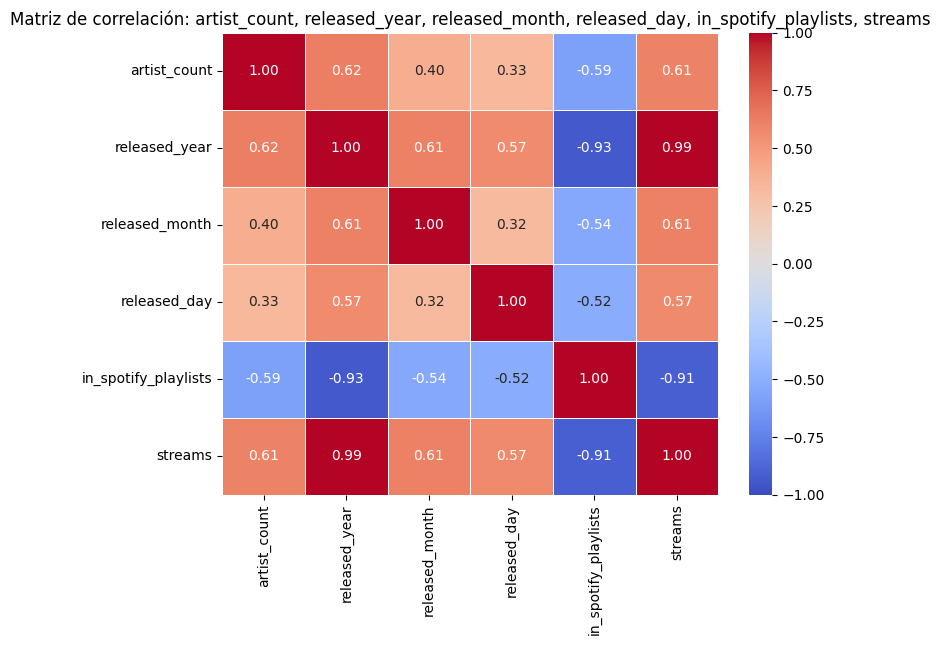

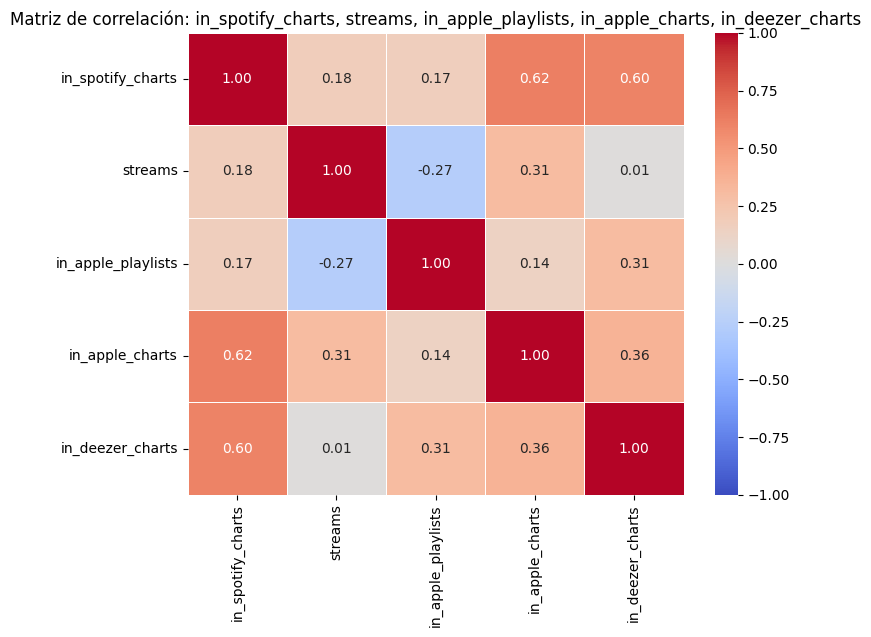

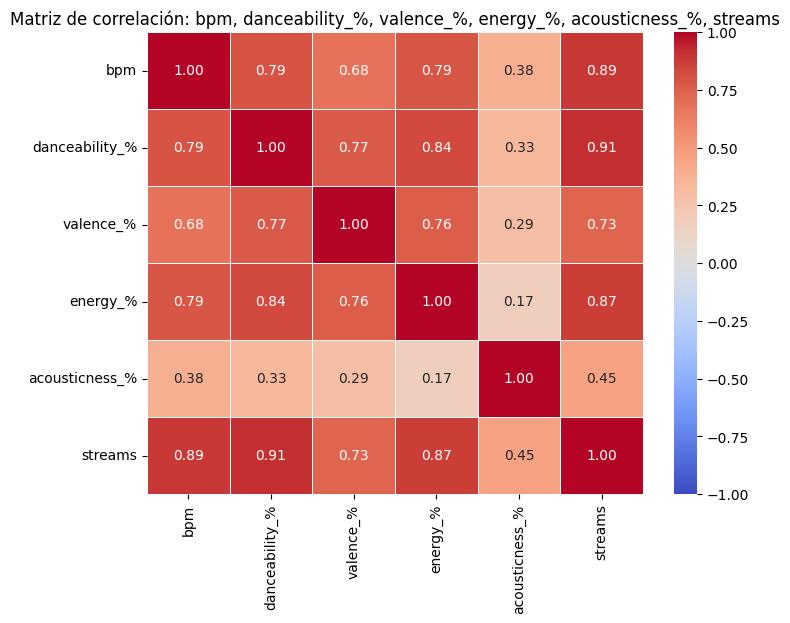

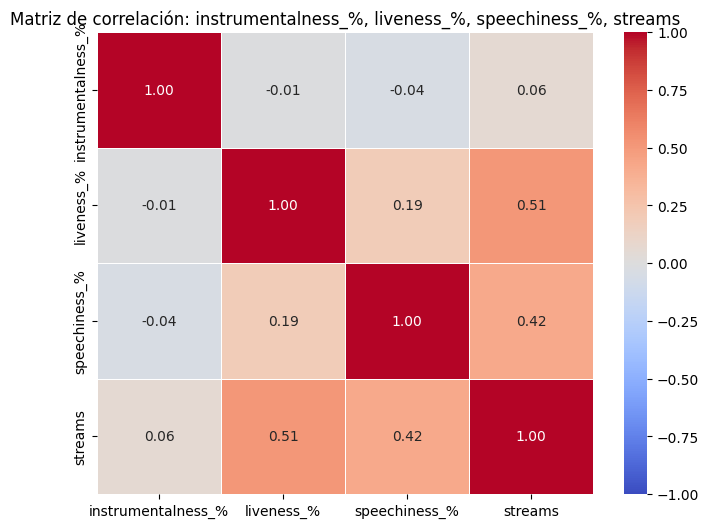

In [104]:
num_cols=df_normalized.select_dtypes(include='number').columns.tolist()
if 'streams' not in num_cols:
    num_cols.append('streams')

n = len(num_cols)
group_size = 5
for i in range(0, n, group_size):
    # Seleccionar un grupo de columnas
    group = num_cols[i:i+group_size]
    if 'streams' not in group:
        group = group + ['streams']  # Asegura que 'streams' esté en el grupo
    
    # Generar la matriz de correlación para el grupo seleccionado
    matriz = df_normalized[group].corr()
    
    # Crear el mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f'Matriz de correlación: {", ".join(group)}')
    plt.show()

En base a la información de los mapas de calor se decide eliminar aquellas features que no tienen relación con streams, los cuales son:

artist_count, released_month, released_day, in_spotify_charts, in_apple_playlists. in_apple_charts, in_deezer_charts, acousticness_%, instrumentalness_%, liveness_%, speechiness_%.


In [106]:
# Eliminar múltiples columnas (por ejemplo, 'streams' y 'bpm')
df_normalized = df_normalized.drop(['artist_count', 'released_month', 'released_day', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)

# Verificar las columnas restantes
print(df_normalized.columns)


Index(['released_year', 'in_spotify_playlists', 'streams', 'bpm',
       'danceability_%', 'valence_%', 'energy_%'],
      dtype='object')



Visualizaciones para la columna:  released_year


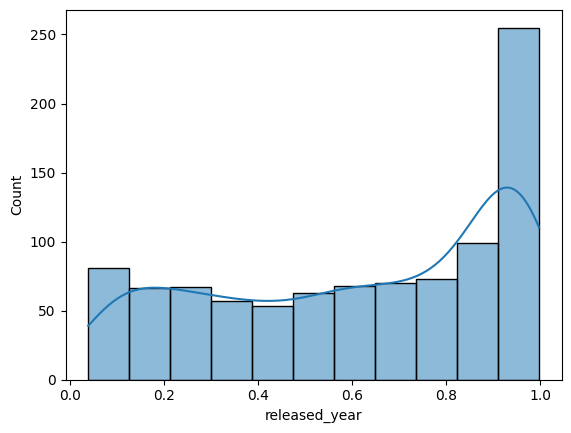

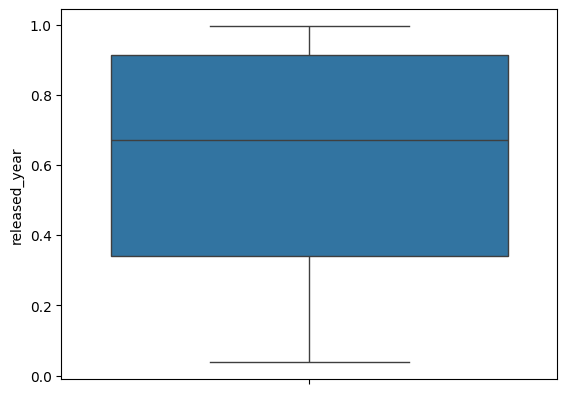


Visualizaciones para la columna:  in_spotify_playlists


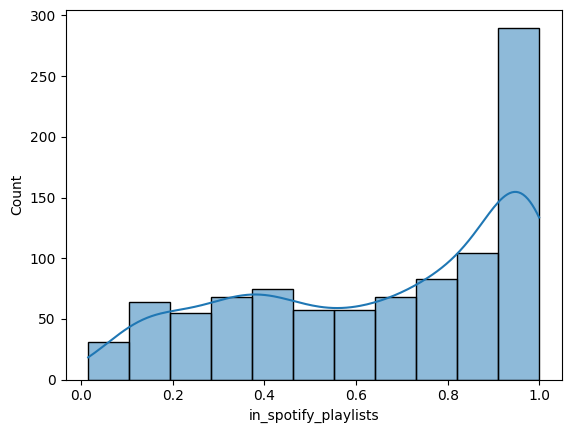

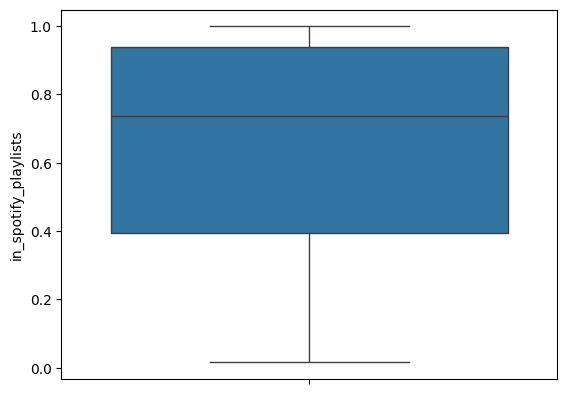


Visualizaciones para la columna:  streams


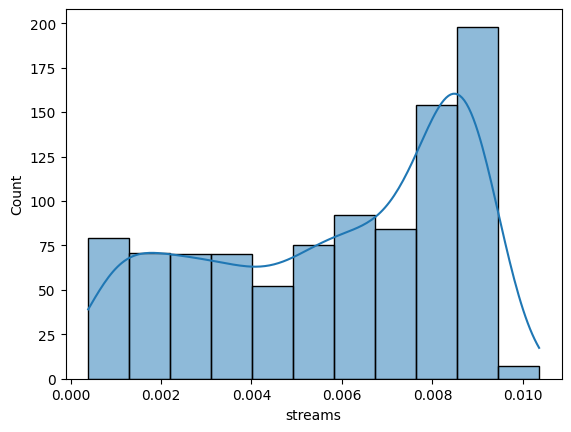

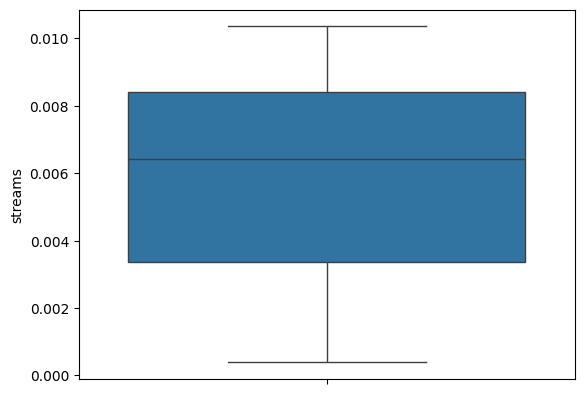


Visualizaciones para la columna:  bpm


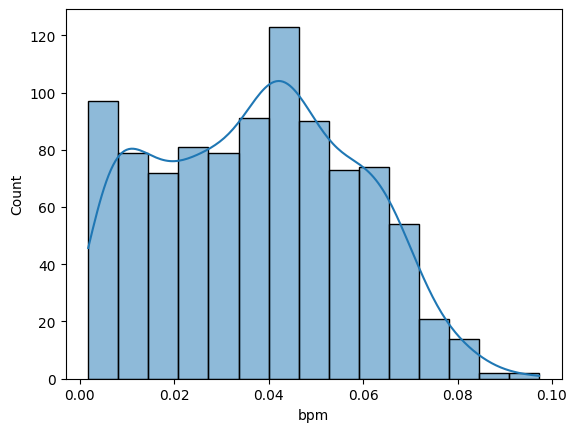

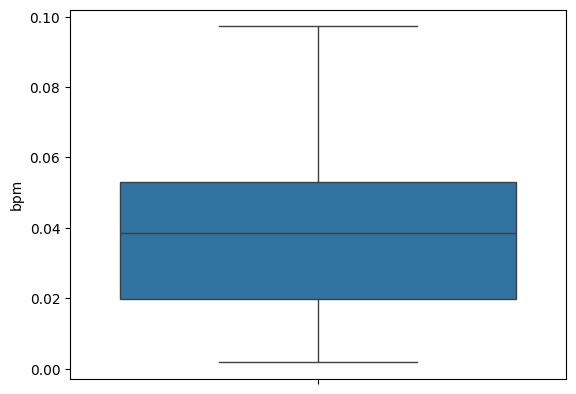


Visualizaciones para la columna:  danceability_%


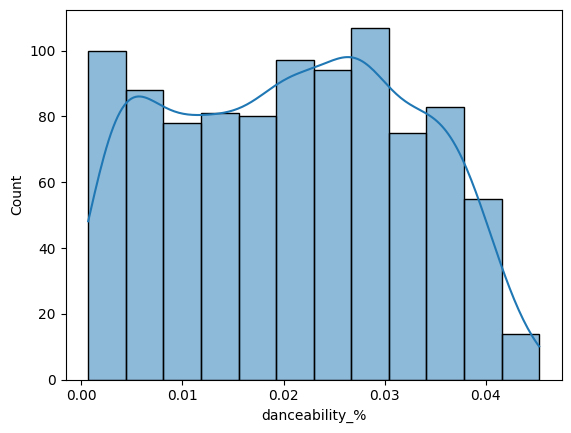

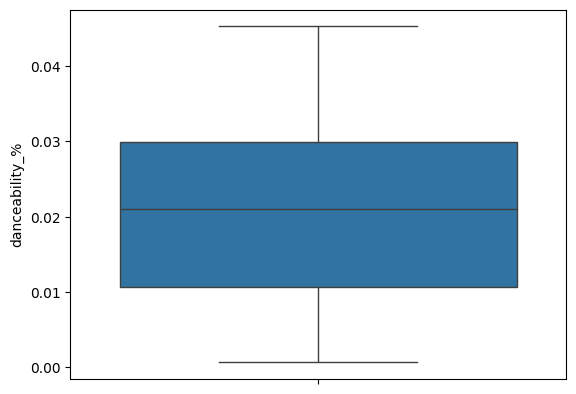


Visualizaciones para la columna:  valence_%


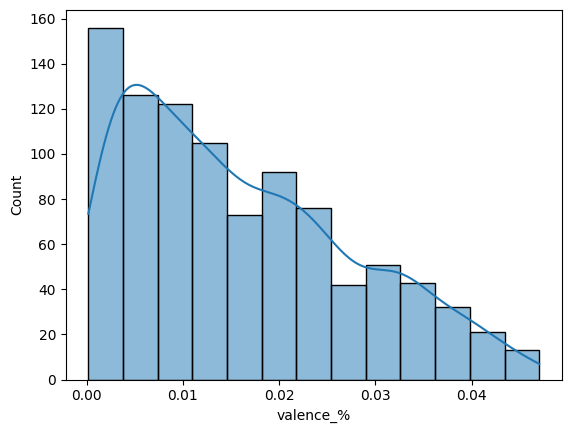

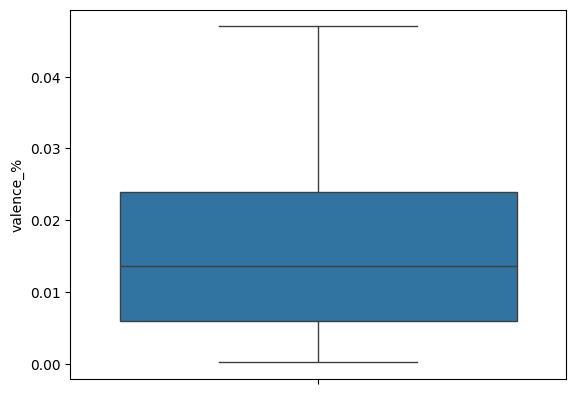


Visualizaciones para la columna:  energy_%


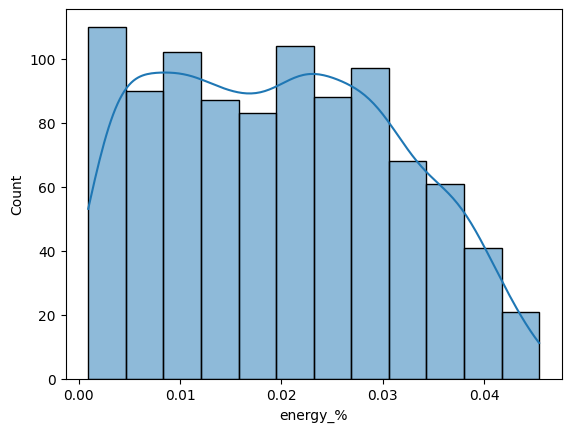

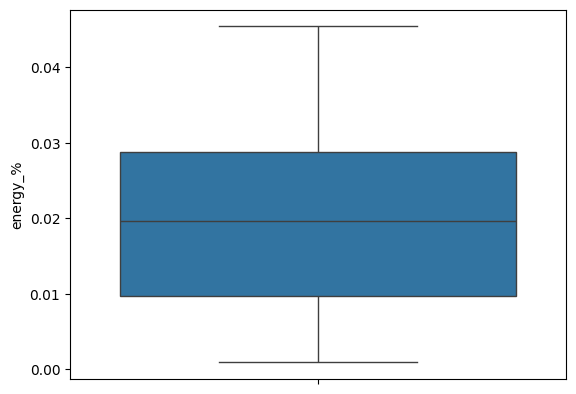

In [111]:
for col in df_normalized:
  print('\nVisualizaciones para la columna: ',col)
  sns.histplot(df_normalized[col],kde=True) # Mostrando la distribución de los datos
  plt.show()
  sns.boxplot(df_normalized[col]) # para ver si hay outliers
  plt.show()

In [112]:
features = ['released_year', 'in_spotify_playlists', 'bpm', 'danceability_%', 'valence_%', 'energy_%']

# Seleccionar las columnas independientes (X) y la variable dependiente (Y)
X = df_normalized[features]
Y = df_normalized['streams']

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

LinearRegression()

In [113]:
# Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Imprimir los coeficientes y el intercepto del modelo
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

# Comparar las predicciones con los valores reales
print(f"Predicciones: {Y_pred[:10]}")
print(f"Valores reales: {Y_test[:10].values}")

Error cuadrático medio (MSE): 6.640864849360991e-08
Coeficientes: [ 9.62260708e-03  1.06905182e-03  1.04918022e-03  5.06628567e-03
  8.94517165e-04 -2.45362690e-05]
Intercepto: -0.0009804352016606266
Predicciones: [0.00745548 0.00823812 0.0085019  0.00105615 0.008598   0.00388894
 0.00753543 0.00894663 0.00092782 0.00885556]
Valores reales: [0.0070618  0.00847861 0.00853966 0.0010406  0.00823106 0.00389173
 0.00742526 0.00959018 0.00091455 0.00862612]


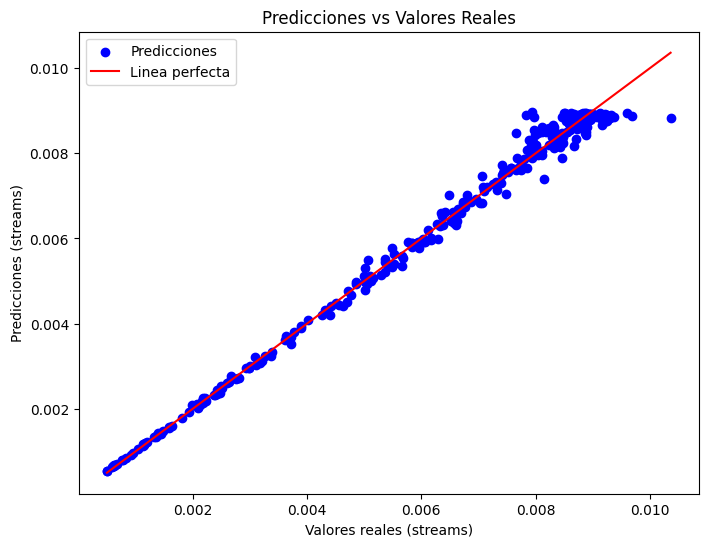

In [114]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Linea perfecta')
plt.xlabel('Valores reales (streams)')
plt.ylabel('Predicciones (streams)')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


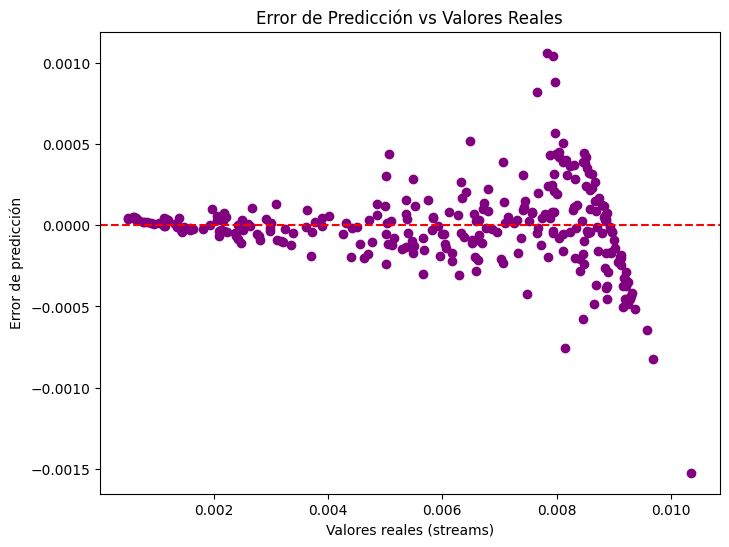

In [115]:
# Calcular los errores (diferencias entre predicciones y valores reales)
errors = Y_pred - Y_test

# Gráfico de los errores de predicción
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, errors, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores reales (streams)')
plt.ylabel('Error de predicción')
plt.title('Error de Predicción vs Valores Reales')
plt.show()


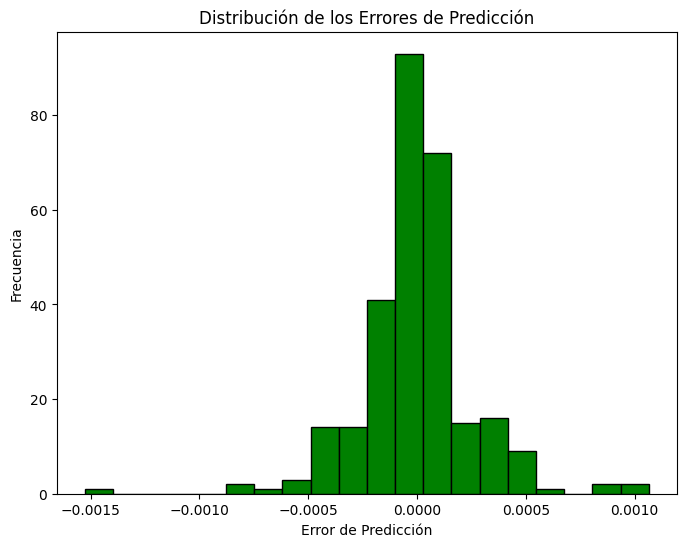

In [116]:
# Histograma de errores
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='green', edgecolor='black')
plt.title('Distribución de los Errores de Predicción')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()


## Conclusión
Podemos apreciar en las gráficas presentadas que el modelo se adaptó muy bien a los datos y hace predicciones correctamente, presentando errores muy bajos.